In [2]:
import pandas as pd
import numpy as np
import random

# Elegir una semilla aleatoria dentro de un rango
seed = random.randint(30, 50)
np.random.seed(seed)
print(f"Usando semilla aleatoria: {seed}")

n = random.randint(60000, 65000)

# Generar variables
temperatura = np.random.normal(loc=22, scale=5, size=n)
personas = np.random.randint(1, 6, size=n).astype(float)
electrodomesticos = np.random.randint(5, 21, size=n).astype(float)

# Calcular consumo con algo de ruido
consumo = (temperatura * 0.85 + personas * 3.2 + electrodomesticos * 1.7 +
           np.random.normal(0, 3, n))

# Introducir NaNs aleatorios (~5%)
for col in [temperatura, personas, electrodomesticos, consumo]:
    idx_nan = np.random.choice(n, size=int(n * 0.05), replace=False)
    col[idx_nan] = np.nan

# Introducir outliers en el consumo (~1%)
outlier_idx = np.random.choice(n, size=int(n * 0.01), replace=False)
consumo[outlier_idx] += np.random.normal(100, 20, size=len(outlier_idx))

# Crear DataFrame
df = pd.DataFrame({
    'Temperatura': temperatura,
    'Personas': personas,
    'Electrodomesticos': electrodomesticos,
    'Consumo_kWh': consumo
})

# Guardar CSV
df.to_csv('consumo_hogar.csv', index=False)
print("Archivo 'consumo_hogar.csv' generado con éxito.")

Usando semilla aleatoria: 40
Archivo 'consumo_hogar.csv' generado con éxito.


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import sys


file_path = "consumo_hogar.csv"  # ajusta la ruta si está en otra carpeta

# Opciones útiles para visualizar tablas completas si las necesitas
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

# Intentos comunes de lectura (primero el más simple)
try:
    data = pd.read_csv(file_path)
except Exception as e:
    # Lectura con parámetros alternativos por si el CSV usa otro separador o encoding
    print("Lectura simple falló:", e, file=sys.stderr)
    try:
        data = pd.read_csv(file_path, sep=';', encoding='latin1', decimal=',')
        print("Leí con sep=';' y encoding='latin1', decimal=','")
    except Exception as e2:
        try:
            data = pd.read_csv(file_path, sep=';', encoding='utf-8', engine='python')
            print("Leí con sep=';' y encoding='utf-8'")
        except Exception as e3:
            raise RuntimeError(
                "No pude leer el archivo con los métodos automáticos. "
                "Por favor verifica la ruta y el formato. Errores:\n"
                f"{e}\n{e2}\n{e3}"
            )

# 1) Mostrar primeras filas
print("\n=== .head() ===")
print(data.head())

# 2) Información general: dtypes, no nulls, memoria
print("\n=== .info() ===")
data.info()

# 3) Estadísticos básicos de columnas numéricas
print("\n=== .describe() (numéricas) ===")
print(data.describe().T)  # .T para tabla más legible

# 4) Estadísticos para columnas no numéricas (solo si existen)
cat_cols = data.select_dtypes(include=['object', 'category']).columns
if len(cat_cols) > 0:
    print("\n=== .describe(include=['object', 'category']) (categóricas) ===")
    print(data.describe(include=['object', 'category']).T)
else:
    print("\nNo hay columnas categóricas en el DataFrame.")

# 5) Conteo de valores nulos por columna (absoluto y %)
null_counts = data.isnull().sum()
null_pct = (null_counts / len(data) * 100).round(2)
null_df = pd.DataFrame({"nulos": null_counts, "pct %": null_pct})
print("\n=== Valores nulos por columna ===")
print(null_df.sort_values("nulos", ascending=False))

# 6) Mostrar tipos de datos (útil si hay columnas mal tipadas)
print("\n=== Tipos de datos por columna ===")
print(data.dtypes)

# 7) Si quieres ver un muestreo aleatorio (útil si el .head() es poco representativo)
print("\n=== Muestra aleatoria de 10 filas ===")
print(data.sample(10, random_state=42))

# 8) Identificar columnas potencialmente numéricas mal parseadas (ej: números como strings)
possible_num_as_obj = [c for c in data.columns if data[c].dtype == 'object' and 
                       data[c].str.replace(',','').str.replace('.','').str.isnumeric().any()]
print("\n=== Columnas objeto que podrían ser numéricas ===")
print(possible_num_as_obj)





=== .head() ===
   Temperatura  Personas  Electrodomesticos  Consumo_kWh
0    18.962262       NaN               16.0    48.219517
1    21.369318       1.0                9.0    34.882095
2    18.576968       5.0               17.0    65.227449
3    26.643574       4.0               20.0    72.510695
4    12.777995       3.0                9.0    36.683860

=== .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60485 entries, 0 to 60484
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperatura        57461 non-null  float64
 1   Personas           57461 non-null  float64
 2   Electrodomesticos  57461 non-null  float64
 3   Consumo_kWh        57461 non-null  float64
dtypes: float64(4)
memory usage: 1.8 MB

=== .describe() (numéricas) ===
                     count       mean        std        min        25%        50%        75%         max
Temperatura        57461.0  22.013368   5.028117  


=== Conteo de valores nulos ===
Temperatura          3024
Personas             3024
Electrodomesticos    3024
Consumo_kWh          3024
dtype: int64

=== Porcentaje de nulos por columna ===
Temperatura          5.0
Personas             5.0
Electrodomesticos    5.0
Consumo_kWh          5.0
dtype: float64
→ Nulos en 'Temperatura' imputados con el promedio: 22.01
→ Nulos en 'Personas' imputados con el promedio: 3.00
→ Nulos en 'Electrodomesticos' imputados con el promedio: 12.52
→ Nulos en 'Consumo_kWh' imputados con el promedio: 50.63


C:\Users\Aleimer Ramirez\AppData\Local\Temp\ipykernel_20844\865218986.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mean_value, inplace=True)


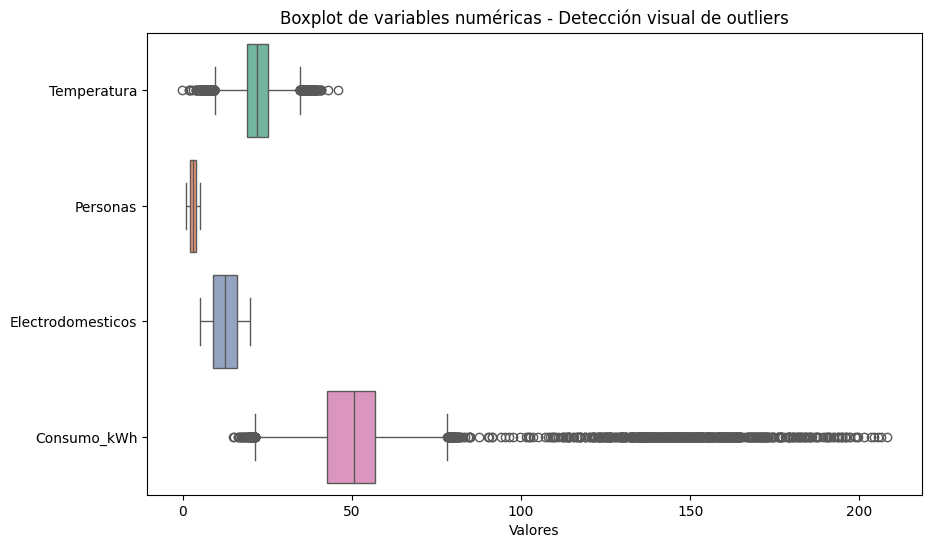


=== Posibles outliers detectados (criterio |z|>3) ===
→ Temperatura: 200 valores atípicos
→ Personas: sin valores atípicos detectados
→ Electrodomesticos: sin valores atípicos detectados
→ Consumo_kWh: 570 valores atípicos

Filas antes de eliminar outliers (Z-Score): 60485
Filas después de eliminar outliers (Z-Score): 59717
Total de filas eliminadas (Z-Score): 768


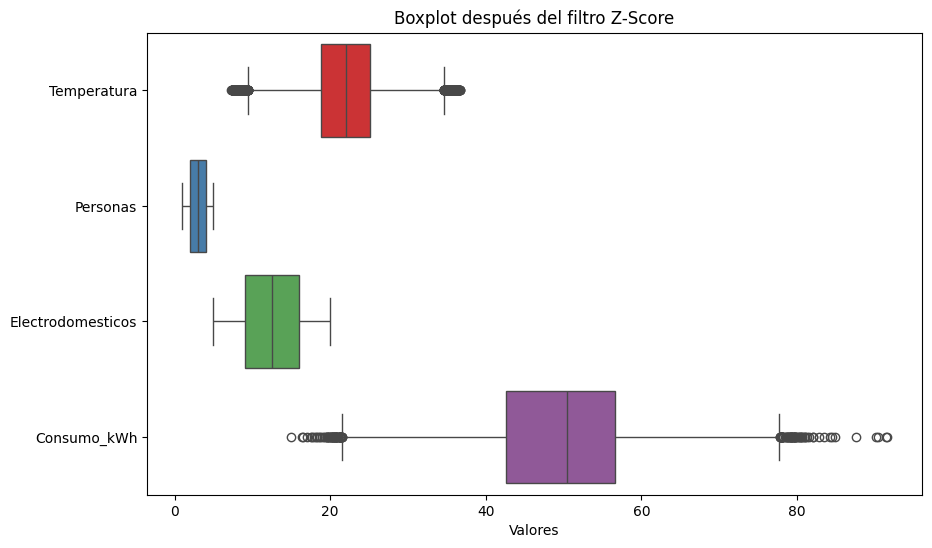

→ 'Temperatura': 495 filas eliminadas (fuera de [9.43, 34.61])
→ 'Personas': 0 filas eliminadas (fuera de [-1.00, 7.00])
→ 'Electrodomesticos': 0 filas eliminadas (fuera de [-1.50, 26.50])
→ 'Consumo_kWh': 119 filas eliminadas (fuera de [21.63, 77.63])

✅ Total de filas eliminadas por método IQR: 614


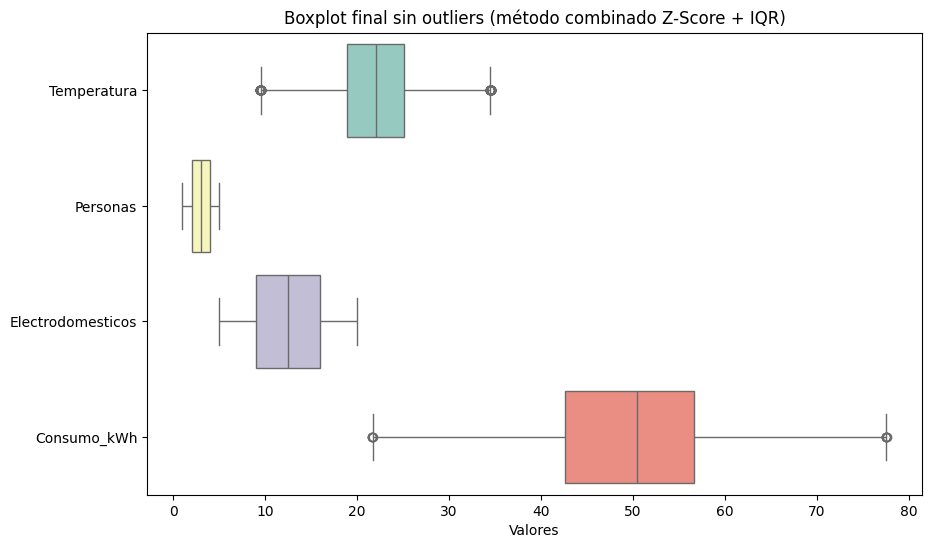


Archivo 'consumo_hogar_limpio_final.csv' guardado exitosamente.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# === Paso 2.1: Cargar el archivo ===
data = pd.read_csv("consumo_hogar.csv")

# === Verificar valores nulos ===
print("\n=== Conteo de valores nulos ===")
print(data.isnull().sum())

# Calcular porcentaje de nulos
null_pct = (data.isnull().sum() / len(data) * 100).round(2)
print("\n=== Porcentaje de nulos por columna ===")
print(null_pct)

# === Estrategia 1: Imputación por promedio (solo columnas numéricas) ===
numeric_cols = data.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    if data[col].isnull().sum() > 0:
        mean_value = data[col].mean()
        data[col].fillna(mean_value, inplace=True)
        print(f"→ Nulos en '{col}' imputados con el promedio: {mean_value:.2f}")

# === Visualización de outliers inicial ===
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numeric_cols], orient="h", palette="Set2")
plt.title("Boxplot de variables numéricas - Detección visual de outliers")
plt.xlabel("Valores")
plt.show()

# ===============================================================
# === DETECCIÓN Y ELIMINACIÓN DE OUTLIERS CON Z-SCORE ===
# ===============================================================

# Calcular z-scores (valor absoluto)
z_scores = np.abs(stats.zscore(data[numeric_cols]))

# Definir umbral
threshold = 3

# Máscara booleana de outliers
outliers_mask = (z_scores > threshold)

# Contar outliers por columna
outlier_counts = np.sum(outliers_mask, axis=0)
print("\n=== Posibles outliers detectados (criterio |z|>3) ===")
for col, count in zip(numeric_cols, outlier_counts):
    if count > 0:
        print(f"→ {col}: {count} valores atípicos")
    else:
        print(f"→ {col}: sin valores atípicos detectados")

# === Eliminar filas con al menos un outlier ===
rows_before = data.shape[0]
data_clean = data[(z_scores < threshold).all(axis=1)]
rows_after = data_clean.shape[0]

print(f"\nFilas antes de eliminar outliers (Z-Score): {rows_before}")
print(f"Filas después de eliminar outliers (Z-Score): {rows_after}")
print(f"Total de filas eliminadas (Z-Score): {rows_before - rows_after}")

# === Visualizar los datos después del Z-Score ===
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_clean[numeric_cols], orient="h", palette="Set1")
plt.title("Boxplot después del filtro Z-Score")
plt.xlabel("Valores")
plt.show()

# ===============================================================
# === ELIMINACIÓN DE OUTLIERS ADICIONAL CON MÉTODO IQR ===
# ===============================================================

def eliminar_outliers_iqr(df, columnas):
    df_limpio = df.copy()
    total_eliminadas = 0
    
    for col in columnas:
        Q1 = df_limpio[col].quantile(0.25)
        Q3 = df_limpio[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        filas_antes = df_limpio.shape[0]
        df_limpio = df_limpio[(df_limpio[col] >= lower) & (df_limpio[col] <= upper)]
        eliminadas = filas_antes - df_limpio.shape[0]
        total_eliminadas += eliminadas
        
        print(f"→ '{col}': {eliminadas} filas eliminadas (fuera de [{lower:.2f}, {upper:.2f}])")
    
    print(f"\n✅ Total de filas eliminadas por método IQR: {total_eliminadas}")
    return df_limpio

# Aplicar limpieza IQR al resultado del Z-Score
data_clean_iqr = eliminar_outliers_iqr(data_clean, numeric_cols)

# === Visualización final ===
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_clean_iqr[numeric_cols], orient="h", palette="Set3")
plt.title("Boxplot final sin outliers (método combinado Z-Score + IQR)")
plt.xlabel("Valores")
plt.show()

# === Guardar el nuevo DataFrame limpio ===
data_clean_iqr.to_csv("consumo_hogar_limpio_final.csv", index=False)
print("\nArchivo 'consumo_hogar_limpio_final.csv' guardado exitosamente.")



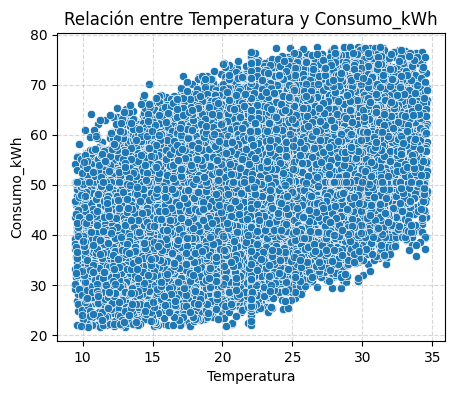

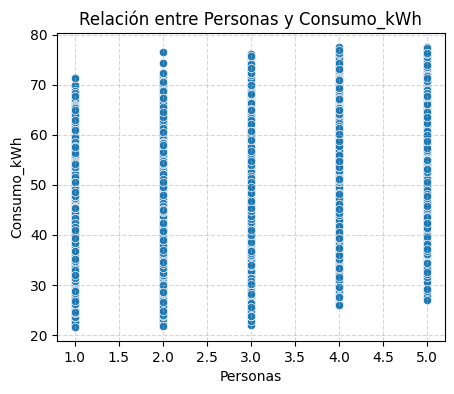

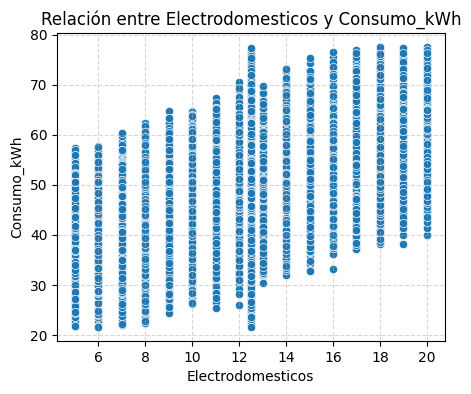


=== Correlación con la variable objetivo ===
Temperatura          0.371899
Personas             0.413302
Electrodomesticos    0.713491
Consumo_kWh          1.000000
Name: Consumo_kWh, dtype: float64


In [11]:
# ===============================================================
# === Paso 3: Visualización exploratoria ===
# ===============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar los datos (si aún no están cargados)
data = pd.read_csv("consumo_hogar_limpio_final.csv")

# 2. Definir variables independientes y dependiente
variables_independientes = ["Temperatura", "Personas", "Electrodomesticos"]
variable_objetivo = "Consumo_kWh"

# 3. Crear gráficos de dispersión (scatterplots)
for var in variables_independientes:
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x=data[var], y=data[variable_objetivo])
    plt.title(f"Relación entre {var} y {variable_objetivo}")
    plt.xlabel(var)
    plt.ylabel(variable_objetivo)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

# 4. (Opcional) Mostrar correlación numérica
print("\n=== Correlación con la variable objetivo ===")
print(data[variables_independientes + [variable_objetivo]].corr(numeric_only=True)["Consumo_kWh"])


In [ ]:

# ===============================================================
# === PASO 4: MODELADO DE REGRESIÓN LINEAL Y POLINÓMICA ===
# ===============================================================

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# ===============================================================
# === 1. Cargar y limpiar los datos ===
# ===============================================================
data = pd.read_csv("consumo_hogar_limpio_final.csv")

# Asegurar que todo sea numérico (convierte strings o vacíos a NaN)
data = data.apply(pd.to_numeric, errors='coerce')

# Imputar valores nulos con el promedio de cada columna
for col in data.columns:
    if data[col].isnull().sum() > 0:
        mean_value = data[col].mean()
        data[col].fillna(mean_value, inplace=True)
        print(f"→ Nulos en '{col}' imputados con el promedio: {mean_value:.2f}")

# Verificar datos después de la limpieza
print("\n=== Datos después de imputación ===")
print(data.head())

# ===============================================================
# === 2. Separar variables (X = independientes, y = dependiente) ===
# ===============================================================
X = data[["Temperatura", "Personas", "Electrodomesticos"]]
y = data["Consumo_kWh"]

print("\nDimensiones de X e y:", X.shape, y.shape)

# ===============================================================
# === 3. División del conjunto de datos (70% entrenamiento / 30% prueba) ===
# ===============================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nTamaños de los conjuntos:")
print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")

# ===============================================================
# === 4. REGRESIÓN LINEAL MÚLTIPLE ===
# ===============================================================
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicción sobre datos de prueba
y_pred_lin = lin_reg.predict(X_test)

# Evaluación (R² y MSE)
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)

print("\n=== REGRESIÓN LINEAL MÚLTIPLE ===")
print(f"Intercepto (b₀): {lin_reg.intercept_:.4f}")
for var, coef in zip(X.columns, lin_reg.coef_):
    print(f"{var}: {coef:.4f}")
print(f"R² (prueba): {r2_lin:.4f}")
print(f"MSE (prueba): {mse_lin:.4f}")

# ===============================================================
# === 5. REGRESIÓN POLINÓMICA (GRADO 2 Y 3) ===
# ===============================================================
for degree in [2, 3]:
    print(f"\n=== REGRESIÓN POLINÓMICA (grado {degree}) ===")

    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)

    y_pred_poly = poly_reg.predict(X_test_poly)

    r2_poly = r2_score(y_test, y_pred_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)

    print(f"Cantidad de características generadas: {X_train_poly.shape[1]}")
    print(f"R² (prueba): {r2_poly:.4f}")
    print(f"MSE (prueba): {mse_poly:.4f}")





=== Datos después de imputación ===
   Temperatura  Personas  Electrodomesticos  Consumo_kWh
0    18.962262  3.003428               16.0    48.219517
1    21.369318  1.000000                9.0    34.882095
2    18.576968  5.000000               17.0    65.227449
3    26.643574  4.000000               20.0    72.510695
4    12.777995  3.000000                9.0    36.683860

Dimensiones de X e y: (59103, 3) (59103,)

Tamaños de los conjuntos:
Entrenamiento: 41372 muestras
Prueba: 17731 muestras

=== REGRESIÓN LINEAL MÚLTIPLE ===
Intercepto (b₀): 2.7343
Temperatura: 0.8031
Personas: 3.0543
Electrodomesticos: 1.6059
R² (prueba): 0.8184
MSE (prueba): 18.1642

=== REGRESIÓN POLINÓMICA (grado 2) ===
Cantidad de características generadas: 9
R² (prueba): 0.8182
MSE (prueba): 18.1763

=== REGRESIÓN POLINÓMICA (grado 3) ===
Cantidad de características generadas: 19
R² (prueba): 0.8183
MSE (prueba): 18.1688



=== COMPARACIÓN DE MODELOS (con datos de prueba 30%) ===
               Modelo        MSE        R²
0              Lineal  18.164211  0.818364
1  Polinómica grado 2  18.176263  0.818244
2  Polinómica grado 3  18.168787  0.818319


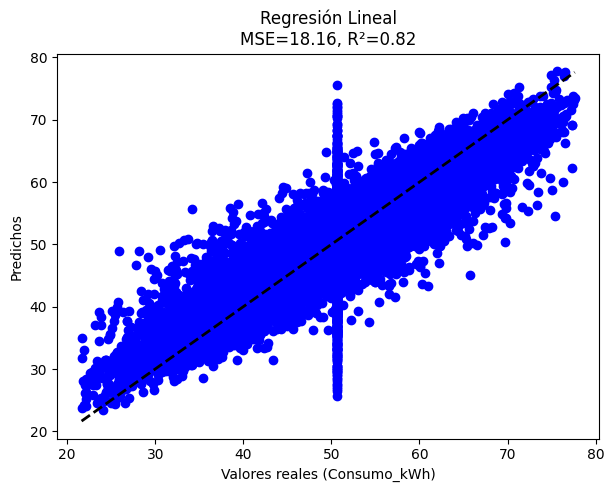

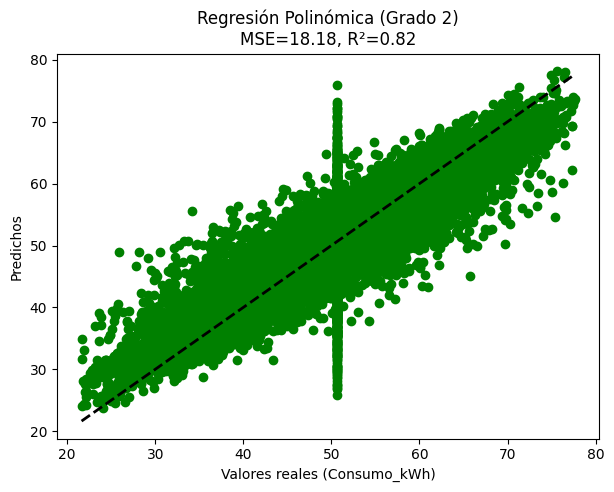

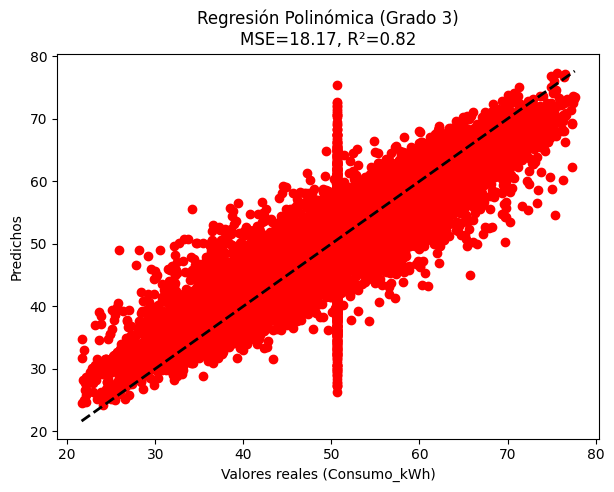

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

# ===============================================================
# === 5. EVALUACIÓN Y COMPARACIÓN DE MODELOS ===
# ===============================================================

# Usa los conjuntos definidos en el código anterior:
# X_train, X_test, y_train, y_test

# --- Regresión lineal múltiple ---
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

# --- Regresión polinómica grado 2 ---
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

poly_reg2 = LinearRegression()
poly_reg2.fit(X_train_poly2, y_train)
y_pred_poly2 = poly_reg2.predict(X_test_poly2)

mse_poly2 = mean_squared_error(y_test, y_pred_poly2)
r2_poly2 = r2_score(y_test, y_pred_poly2)

# --- Regresión polinómica grado 3 ---
poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

poly_reg3 = LinearRegression()
poly_reg3.fit(X_train_poly3, y_train)
y_pred_poly3 = poly_reg3.predict(X_test_poly3)

mse_poly3 = mean_squared_error(y_test, y_pred_poly3)
r2_poly3 = r2_score(y_test, y_pred_poly3)

# ===============================================================
# === COMPARACIÓN EN TABLA ===
# ===============================================================
resultados = pd.DataFrame({
    "Modelo": ["Lineal", "Polinómica grado 2", "Polinómica grado 3"],
    "MSE": [mse_lin, mse_poly2, mse_poly3],
    "R²": [r2_lin, r2_poly2, r2_poly3]
})

print("\n=== COMPARACIÓN DE MODELOS (con datos de prueba 30%) ===")
print(resultados)

# ===============================================================
# === GRÁFICAS SEPARADAS ===
# ===============================================================
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_lin, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Valores reales (Consumo_kWh)")
plt.ylabel("Predichos")
plt.title(f"Regresión Lineal\nMSE={mse_lin:.2f}, R²={r2_lin:.2f}")
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_poly2, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Valores reales (Consumo_kWh)")
plt.ylabel("Predichos")
plt.title(f"Regresión Polinómica (Grado 2)\nMSE={mse_poly2:.2f}, R²={r2_poly2:.2f}")
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_poly3, color="red")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Valores reales (Consumo_kWh)")
plt.ylabel("Predichos")
plt.title(f"Regresión Polinómica (Grado 3)\nMSE={mse_poly3:.2f}, R²={r2_poly3:.2f}")
plt.show()





In [ ]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ============================
# CONFIGURACIÓN DEL USUARIO
# ============================

# Cambia esta ruta por la de tu CSV
csv_path = "consumo_hogar_limpio_final.csv"  # ejemplo: "C:/Users/TuUsuario/Documentos/datos.csv"

# Carpeta de salida de los gráficos
output_dir = "graficos_salida"
os.makedirs(output_dir, exist_ok=True)

# ============================
# CARGA DE DATOS
# ============================
try:
    df = pd.read_csv(csv_path)
    print(f"✅ Archivo CSV cargado correctamente: {csv_path}")
except Exception as e:
    raise SystemExit(f"❌ Error al cargar el archivo CSV: {e}")

print(f"Filas: {df.shape[0]}  |  Columnas: {df.shape[1]}")

# ============================
# DETECCIÓN DE TIPOS DE DATOS
# ============================

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print(f"\nColumnas numéricas detectadas: {num_cols}")
print(f"Columnas categóricas detectadas: {cat_cols}\n")

# ============================
# 1. HISTOGRAMAS
# ============================

for col in num_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col].dropna(), bins='auto')
    plt.title(f"Histograma — {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"hist_{col}.png"))
    plt.close()

print("📊 Histogramas generados.")

# ============================
# 2. DIAGRAMAS DE BIGOTES (BOXPLOTS)
# ============================

# Boxplot combinado
if len(num_cols) > 0:
    plt.figure(figsize=(10, 6))
    plt.boxplot([df[c].dropna() for c in num_cols], labels=num_cols, vert=True)
    plt.title("Boxplot combinado — columnas numéricas")
    plt.ylabel("Valor")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "boxplot_combinado.png"))
    plt.close()

# Boxplots individuales
for col in num_cols:
    plt.figure(figsize=(6, 6))
    plt.boxplot(df[col].dropna(), labels=[col])
    plt.title(f"Boxplot — {col}")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"boxplot_{col}.png"))
    plt.close()

print("📦 Diagramas de bigotes generados.")

# ============================
# 3. MAPA DE CORRELACIÓN (HEATMAP)
# ============================

if len(num_cols) >= 2:
    corr = df[num_cols].corr()
    plt.figure(figsize=(8, 6))
    im = plt.imshow(corr, interpolation='nearest', aspect='auto')
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.title("Mapa de correlación (pearson)")
    plt.xticks(ticks=np.arange(len(num_cols)), labels=num_cols, rotation=45, ha='right')
    plt.yticks(ticks=np.arange(len(num_cols)), labels=num_cols)
    for i in range(len(num_cols)):
        for j in range(len(num_cols)):
            plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', fontsize=8)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "correlation_heatmap.png"))
    plt.close()
    print("🔥 Mapa de correlación generado.")
else:
    print("⚠️ No hay suficientes columnas numéricas para generar el mapa de correlación.")

# ============================
# 4. DIAGRAMAS DE FRECUENCIAS (BARRAS)
# ============================

# Para columnas categóricas
for col in cat_cols:
    vc = df[col].value_counts(dropna=True)
    top = vc.head(20)
    plt.figure(figsize=(8, 6))
    plt.bar(top.index.astype(str), top.values)
    plt.title(f"Diagrama de frecuencias — {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"barfreq_{col}.png"))
    plt.close()

print("📈 Diagramas de barras generados.")

print("\n✅ Todos los gráficos fueron generados correctamente.")
print(f"📂 Carpeta de salida: {os.path.abspath(output_dir)}")

print("\nTipos de gráficos generados:")
print(" - Histogramas")
print(" - Diagramas de bigotes")
print(" - Mapa de correlación")
print(" - Diagramas de frecuencia en barras")

